In [1]:
!pip install dask

In [2]:
!pip install graphviz

In [3]:
import dask.array as da

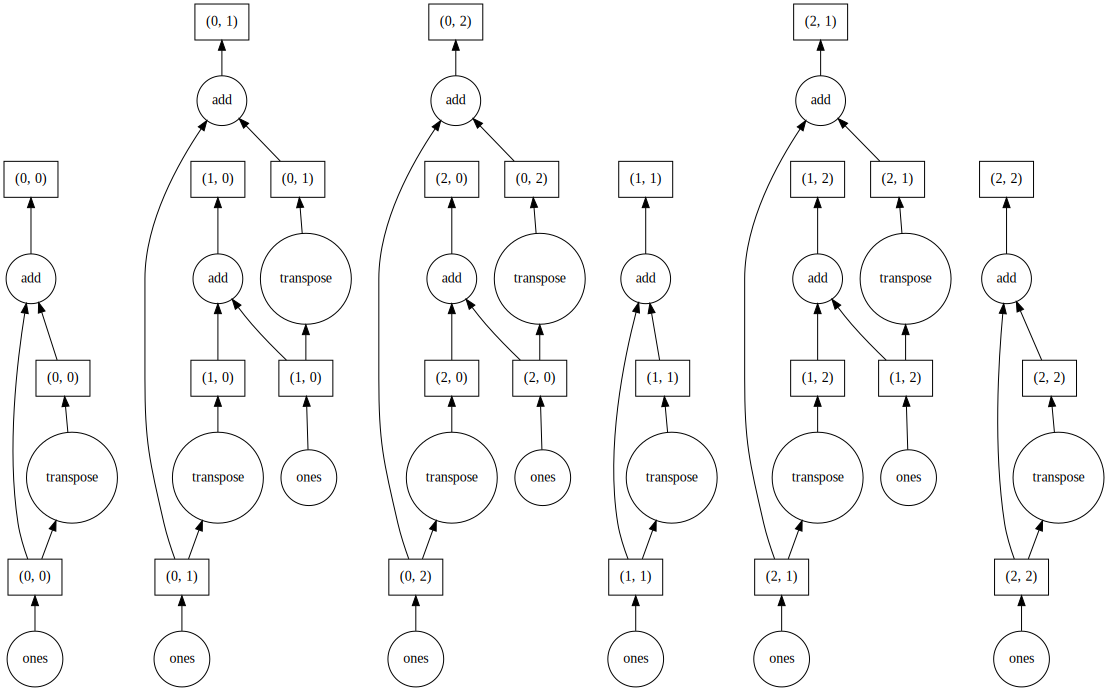

In [4]:
x = da.ones((15,15), chunks =(5,5))

y = x + x.T

#y.compute()
y.visualize(filename = 'transpose.svg')

In [6]:
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 

110
Square: 100
111
Cube: 1000
Done!


In [8]:
from time import sleep

def apply_discount(x):
  sleep(1)
  x = x - 0.3*x
  return x

def get_total(a,b):
  sleep(1)
  return a+b

def total_price(x,y):
  sleep(1)
  a = apply_discount(x)
  b = apply_discount(y)
  get_total(a,b)

In [9]:
%%time
a = apply_discount(1000)
b = apply_discount(4000)
c = get_total(a,b)

CPU times: user 314 µs, sys: 33 µs, total: 347 µs
Wall time: 3 s


In [10]:
%%time
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.compute()
z.visualize()

CPU times: user 8.62 ms, sys: 3.88 ms, total: 12.5 ms
Wall time: 5.05 s


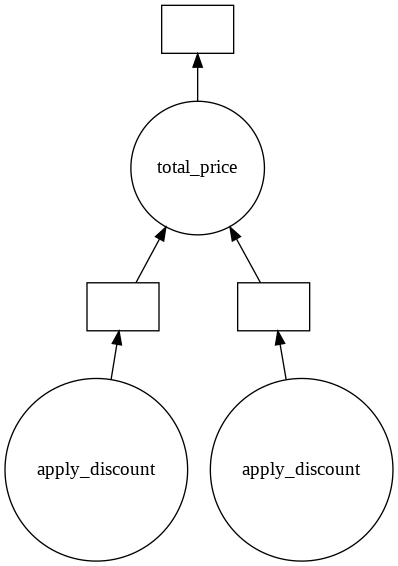

In [11]:
z.visualize()

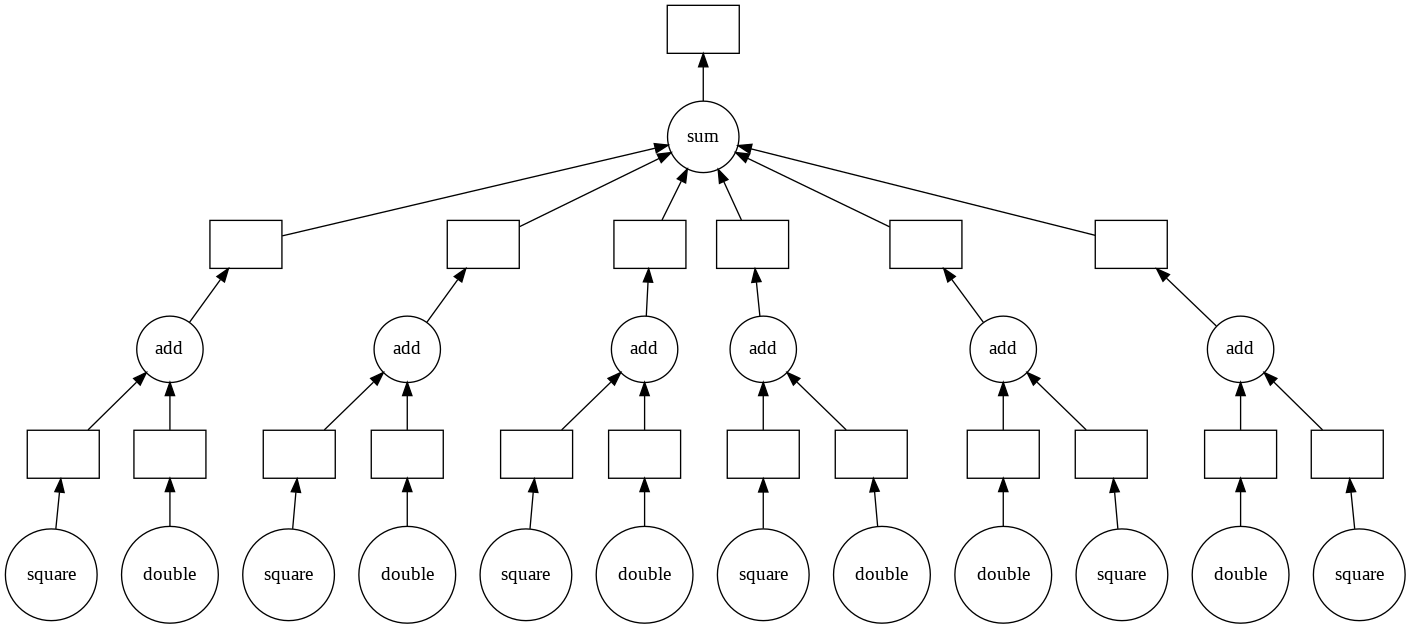

In [12]:
@delayed
def square(x):
  return x*x
@delayed
def double(x):
  return x*2
@delayed
def add(x, y):
  return x + y



# For loop that calls the above functions for each data
output = []
for i in range(6):
  a = square(i)
  b = double(i)
  c = add(a, b)
  output.append(c)

total = delayed(sum)(output)
total.visualize()

In [13]:
!pip install 'fsspec>=0.3.3'
import dask.dataframe as dd

     |████████████████████████████████| 112kB 12.4MB/s 


In [14]:
import concurrent
import multiprocessing
multiprocessing.cpu_count()

2

In [15]:
dask.__version__

'2.12.0'

In [16]:
df = dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [17]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,981,Kevin,0.017239,-0.295111
2000-01-01 00:00:01,1002,Alice,-0.772790,0.019701
2000-01-01 00:00:02,990,Ingrid,0.563290,0.253146
2000-01-01 00:00:03,987,Ray,-0.330062,0.246984
2000-01-01 00:00:04,972,Kevin,-0.491598,0.788978


In [18]:
df1 = df.groupby('name').y.std()
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [19]:
df1.compute()

name
Alice       0.577969
Bob         0.577294
Charlie     0.578404
Dan         0.578075
Edith       0.577093
Frank       0.576843
George      0.578233
Hannah      0.578587
Ingrid      0.576637
Jerry       0.577219
Kevin       0.578059
Laura       0.576686
Michael     0.576785
Norbert     0.577017
Oliver      0.578562
Patricia    0.577104
Quinn       0.578663
Ray         0.578717
Sarah       0.577394
Tim         0.577878
Ursula      0.577072
Victor      0.577913
Wendy       0.577730
Xavier      0.576972
Yvonne      0.575881
Zelda       0.577581
Name: y, dtype: float64

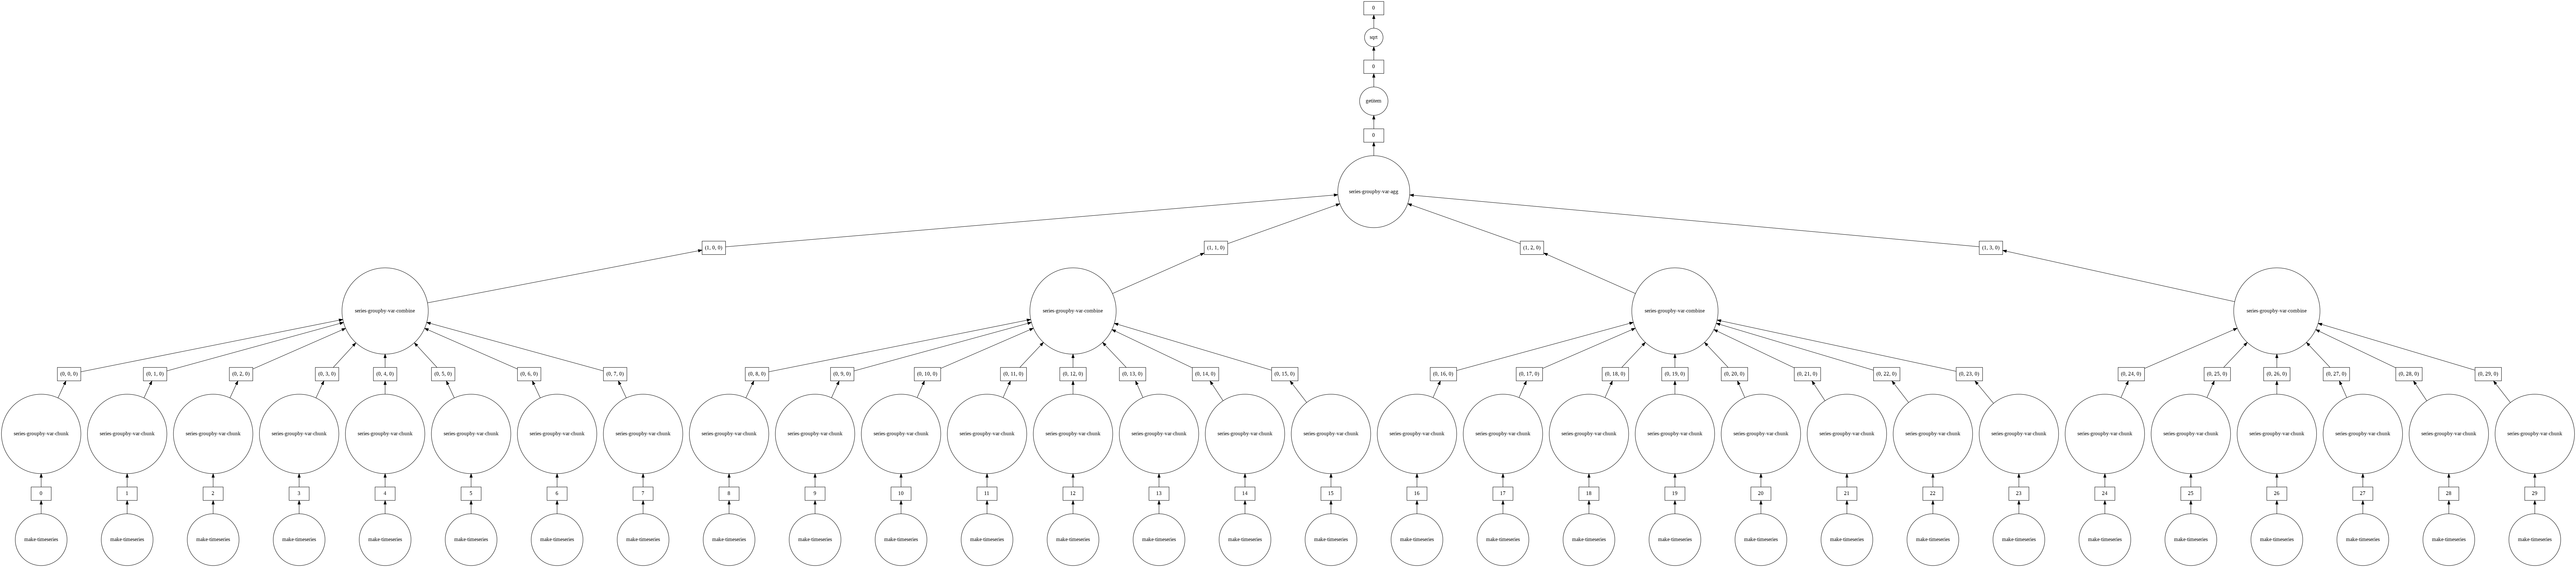

In [20]:
df1.visualize()

In [21]:
%%time
df.loc['2000-01-01']

CPU times: user 5.42 ms, sys: 0 ns, total: 5.42 ms
Wall time: 5.95 ms


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [22]:
df = df.persist()

In [23]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,981,Kevin,0.017239,-0.295111
2000-01-01 00:00:01,1002,Alice,-0.772790,0.019701
2000-01-01 00:00:02,990,Ingrid,0.563290,0.253146
2000-01-01 00:00:03,987,Ray,-0.330062,0.246984
2000-01-01 00:00:04,972,Kevin,-0.491598,0.788978
...,...,...,...,...
2000-01-01 23:59:55,1002,George,0.473430,-0.268075
2000-01-01 23:59:56,993,Kevin,0.133830,0.993325
2000-01-01 23:59:57,1008,George,0.261933,-0.867226


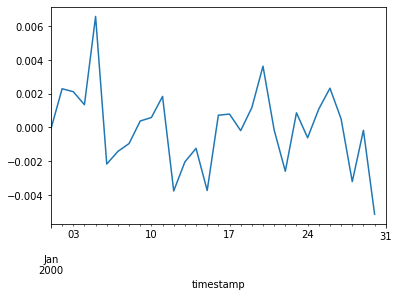

In [25]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [26]:
len(df)

2592000

In [27]:
from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [28]:
client = Client(processes = False)

/usr/local/lib/python3.7/dist-packages/distributed/bokeh/core.py:57: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 99] Cannot assign requested address
  warnings.warn('\n' + msg)
/usr/local/lib/python3.7/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

[Errno 99] Cannot assign requested address
  self.scheduler.start(scheduler_address)


In [29]:
client

Client Scheduler: inproc://172.28.0.2/59/1,Cluster Workers: 1 Cores: 2 Memory: 13.65 GB


In [30]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.823839,0.490378,0.994732,0.160996
1,0.708242,0.033125,0.153466,0.957394
2,0.700767,0.257213,0.428154,0.705433
3,0.757487,0.718959,0.287512,0.334653
4,0.660658,0.962816,0.203349,0.523715


In [31]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [32]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 9.75 s, sys: 87.3 ms, total: 9.84 s
Wall time: 21.3 s


In [33]:
results

[4999523.396608133, 5000289.320937925, 4998918.567274245, 4999890.955209481]

In [34]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 1.07 ms, sys: 4 µs, total: 1.07 ms
Wall time: 887 µs


In [35]:
results[0]

Delayed('costly_simulation-ed5f8cbf-3eb8-446f-909a-e817c3feee41')

In [36]:
%time dask.compute(*results)

/usr/local/lib/python3.7/dist-packages/distributed/worker.py:2791: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([0.4903783 , 0.0331246 , 0.25721339, ..., 0 ...  0.51907146]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


CPU times: user 9.82 s, sys: 243 ms, total: 10.1 s
Wall time: 15.8 s


(4999523.396608133, 5000289.320937925, 4998918.567274245, 4999890.955209481)